This data was gathered from the publicly available US Census Bureau Microdata service. It is the "ACS 5-Year Estimates - Public Use Microdata Sample" for 2017. The values in each column are as follows:

1) ID number -- Number provided by python automatically, starts at 0, ends at 478

2) Occupation (2010 OCC codes) -- The occupation code from the BLS's 2010 SOC codes, some occupations abbreviated for space considerations. Designated as "SOCP" on the site.

3) Wages (past 12 months) -- The average of wages or salary income over the past 12 months for the occupation as a whole. Designated as "WAGP" on the site.

4) Wages-Male -- The average of wages or salary income for male workers in the occupation over the past 12 months. Designated with "SEX" and WAGP" on the site.

5) Wages-Female -- The average of wages or salary income for female workers in the occupation over the past 12 months. Designated with "SEX" and WAGP" on the site.

6) Number-Male -- The number of male workers in the occupation. Designated with "SEX" on the site.

7) Number-Female -- The number of female workers in the occupation. Designated with "SEX" on the site.

8) STEM -- This part of the dataset came from https://www.bls.gov/oes/topics.htm#stem. It can be found under the "STEM" header as a downloadable xlsx file at www.bls.gov/oes/stem_list.xlsx. The occupations listed in the file are those occupations that the Bureau of Labor Statistics considers to be STEM occupations. I took the information from the STEM listings and put a 1 in this column if the occupation was a STEM occupation and a 0 otherwise.

In [1]:
#Import dataset
import pandas as pd
df=pd.read_csv("data/HW2/ACS_5yr_2017.csv")

In [2]:
df.head(10)

,Occupation (2010 OCC codes),Wages (past 12 months),Wages-Male,Wages-Female,Number-Male,Number-Female,STEM
0,MGR-CHIEF EXECUTIVES AND LEGISLATORS,137002.62900,147558.30920,105587.25000,1057950,355475,0
1,MGR-GENERAL AND OPERATIONS MANAGERS,78333.71924,85965.37339,60826.10228,735406,320567,0
2,MGR-ADVERTISING AND PROMOTIONS MANAGERS,67149.04424,81042.90196,57408.13968,22808,32532,0
3,MGR-MARKETING AND SALES MANAGERS,86869.12847,104355.47340,66662.41456,562079,486408,0
4,MGR-PUBLIC RELATIONS AND FUNDRAISING MANAGERS,75050.92865,84767.86348,69878.25652,23089,43373,0
5,MGR-ADMINISTRATIVE SERVICES MANAGERS,60203.01113,65278.16007,51752.24660,107026,64275,0
6,MGR-COMPUTER AND INFORMATION SYSTEMS MANAGERS,99932.18735,106888.81410,82995.48897,457274,187822,1
7,MGR-FINANCIAL MANAGERS,88414.25231,115926.09310,65169.66131,594933,704151,0
8,MGR-COMPENSATION AND BENEFITS MANAGERS,73249.94261,95815.00847,66290.07247,4724,15316,0
9,MGR-HUMAN RESOURCES MANAGERS,70005.64128,77635.23174,64998.01694,187626,285866,0


In [3]:
#what a woman makes for every $1.00 a man makes (regardless of occupation)
sum(df['Wages-Female']*df['Number-Female'])/sum(df['Wages-Male']*df['Number-Male'])

0.6191731090726126

In [4]:
#What a woman in the same occupation makes for every $1.00 a man makes
sum(df['Wages-Female'][:-1]/df['Wages-Male'][:-1])/len(df.index)

0.7663758019996237

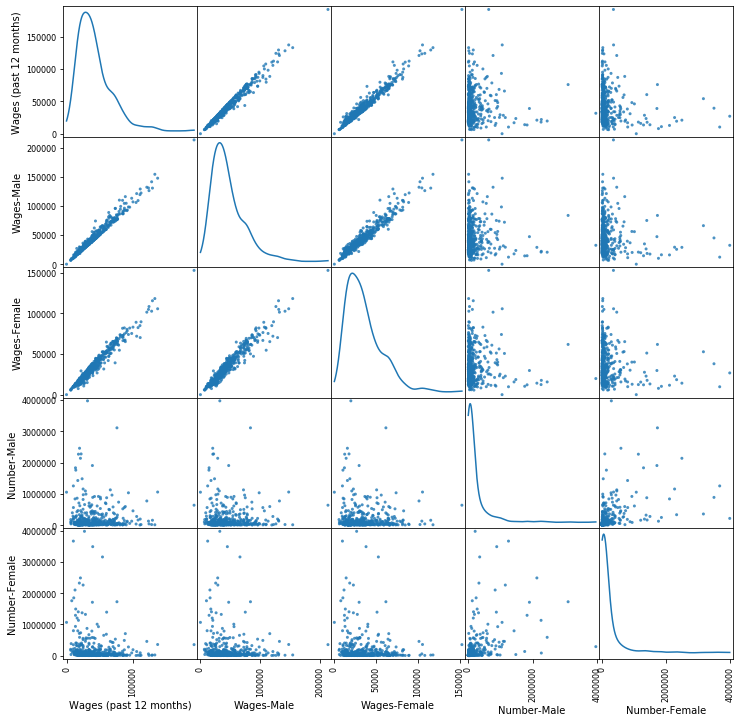

In [6]:
#SPLOM to visualize the columns of this dataset.
smaller_frame=df[['Wages (past 12 months)', 'Wages-Male', 'Wages-Female', 'Number-Male', 'Number-Female']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [7]:
#To see if there is strong correlation between the features, ran a correlation analysis on the features.

df.corr()

,Wages (past 12 months),Wages-Male,Wages-Female,Number-Male,Number-Female,STEM
Wages (past 12 months),1.000000,0.986729,0.979212,-0.005841,-0.120729,0.431259
Wages-Male,0.986729,1.000000,0.966439,-0.010526,-0.085219,0.388524
Wages-Female,0.979212,0.966439,1.000000,-0.033101,-0.098145,0.439224
Number-Male,-0.005841,-0.010526,-0.033101,1.000000,0.428073,-0.045650
Number-Female,-0.120729,-0.085219,-0.098145,0.428073,1.000000,-0.104114
STEM,0.431259,0.388524,0.439224,-0.045650,-0.104114,1.000000


In [8]:
df.describe()

,Wages (past 12 months),Wages-Male,Wages-Female,Number-Male,Number-Female,STEM
count,479.000000,479.000000,479.000000,4.790000e+02,4.790000e+02,479.000000
mean,41625.642456,45910.165293,35072.283098,2.048505e+05,1.911033e+05,0.104384
std,24863.779334,27332.778927,21034.593307,3.995294e+05,4.612860e+05,0.306078
min,0.000000,0.000000,0.000000,2.549000e+03,1.900000e+02,0.000000
25%,23167.550060,26549.268710,19352.601050,2.630950e+04,8.644500e+03,0.000000
50%,36301.328950,39482.129500,30489.704560,6.275600e+04,4.117300e+04,0.000000
75%,52013.546290,57960.589875,45255.683625,1.801175e+05,1.497175e+05,0.000000
max,191740.355200,213222.073400,152777.891800,3.968151e+06,3.987371e+06,1.000000


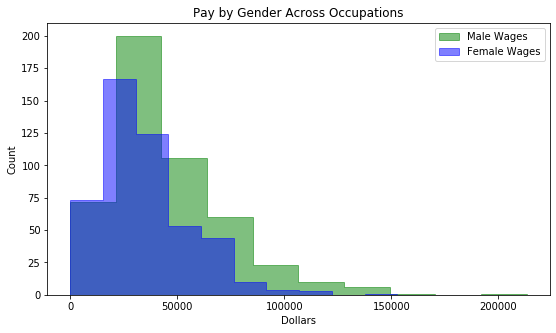

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5)) 

ax1 = fig.add_subplot(1, 1, 1)

data = df['Wages-Male']
data1 = df['Wages-Female']
ax1.hist(data, color = 'green', alpha = 0.5, histtype = 'step', fill = True, label = 'Male Wages') 
ax1.hist(data1, color = 'blue', alpha = 0.5, histtype = 'step', fill = True, label = 'Female Wages') 

plt.title('Pay by Gender Across Occupations')
plt.xlabel('Dollars')
plt.ylabel('Count')

plt.legend(loc = 'upper right')
plt.show()

In [57]:
import numpy as np
data = {"Occupation (2010 OCC codes)": np.array(df["Occupation (2010 OCC codes)"]),
    "Norm Pay Diff": np.array((df["Wages-Male"]-df["Wages-Female"])/df["Wages (past 12 months)"]), 
"Norm Num Diff": np.array((df["Number-Male"]-df["Number-Female"])/(df["Number-Male"]+df["Number-Female"]))}
new_df = pd.DataFrame(data)
new_df.head()

,Occupation (2010 OCC codes),Norm Pay Diff,Norm Num Diff
0,MGR-CHIEF EXECUTIVES AND LEGISLATORS,0.306352,0.497002
1,MGR-GENERAL AND OPERATIONS MANAGERS,0.320925,0.392850
2,MGR-ADVERTISING AND PROMOTIONS MANAGERS,0.351975,-0.175714
3,MGR-MARKETING AND SALES MANAGERS,0.433906,0.072172
4,MGR-PUBLIC RELATIONS AND FUNDRAISING MANAGERS,0.198393,-0.305197


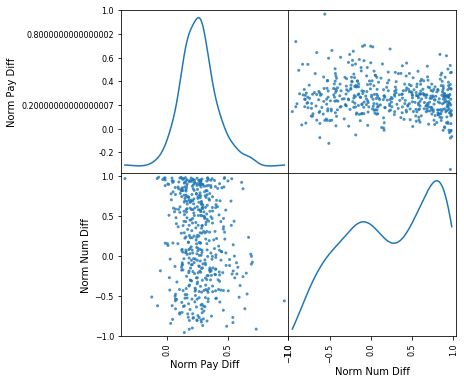

In [35]:
#SPLOM to visualize the columns of this dataset.
smaller_frame=new_df[['Norm Pay Diff', 'Norm Num Diff']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(6, 6), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

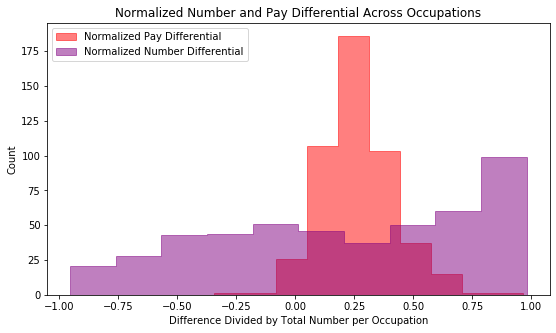

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5)) 

ax1 = fig.add_subplot(1, 1, 1)

data = new_df['Norm Pay Diff']
data1 = new_df['Norm Num Diff']
ax1.hist(data, color = 'red', alpha = 0.5, histtype = 'step', fill = True, label = 'Normalized Pay Differential') 
ax1.hist(data1, color = 'purple', alpha = 0.5, histtype = 'step', fill = True, label = 'Normalized Number Differential') 

plt.title('Normalized Number and Pay Differential Across Occupations')
plt.xlabel('Difference Divided by Total Number per Occupation')
plt.ylabel('Count')

plt.legend(loc = 'upper left')
plt.show()

In [13]:
#To see if there is strong correlation between the features, ran a correlation analysis on the features.

smaller_frame.corr()

,Norm Pay Diff,Norm Num Diff
Norm Pay Diff,1.000000,-0.156724
Norm Num Diff,-0.156724,1.000000


In [59]:
combo_df = df.merge(new_df, left_on = df["Occupation (2010 OCC codes)"], right_on = new_df["Occupation (2010 OCC codes)"])

In [60]:
combo_df.corr()

,Wages (past 12 months),Wages-Male,Wages-Female,Number-Male,Number-Female,STEM,Norm Pay Diff,Norm Num Diff
Wages (past 12 months),1.000000,0.986729,0.979212,-0.005841,-0.120729,0.431259,-0.048376,0.174642
Wages-Male,0.986729,1.000000,0.966439,-0.010526,-0.085219,0.388524,0.049680,0.067147
Wages-Female,0.979212,0.966439,1.000000,-0.033101,-0.098145,0.439224,-0.169228,0.087462
Number-Male,-0.005841,-0.010526,-0.033101,1.000000,0.428073,-0.045650,0.062070,0.126207
Number-Female,-0.120729,-0.085219,-0.098145,0.428073,1.000000,-0.104114,0.078129,-0.381682
STEM,0.431259,0.388524,0.439224,-0.045650,-0.104114,1.000000,-0.133800,0.166206
Norm Pay Diff,-0.048376,0.049680,-0.169228,0.062070,0.078129,-0.133800,1.000000,-0.156724
Norm Num Diff,0.174642,0.067147,0.087462,0.126207,-0.381682,0.166206,-0.156724,1.000000


In [14]:
new_df.describe()

,Norm Pay Diff,Norm Num Diff
count,478.000000,479.000000
mean,0.264706,0.209568
std,0.151123,0.552185
min,-0.344515,-0.953359
25%,0.165611,-0.226413
50%,0.257227,0.232463
75%,0.341144,0.728525
max,0.967766,0.981378


Automatically created module for IPython interactive environment


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


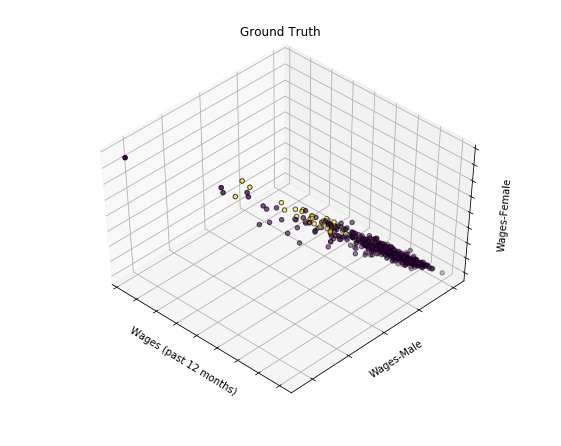

In [62]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

X = np.array(df[['Wages (past 12 months)', 'Wages-Male', 'Wages-Female', 'Number-Male', 'Number-Female']])
y = []
for ele in np.array(df[['STEM']]):
    y.append(int(ele))
    
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y = np.choose(y, np.arange(2))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Wages (past 12 months)')
ax.set_ylabel('Wages-Male')
ax.set_zlabel('Wages-Female')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


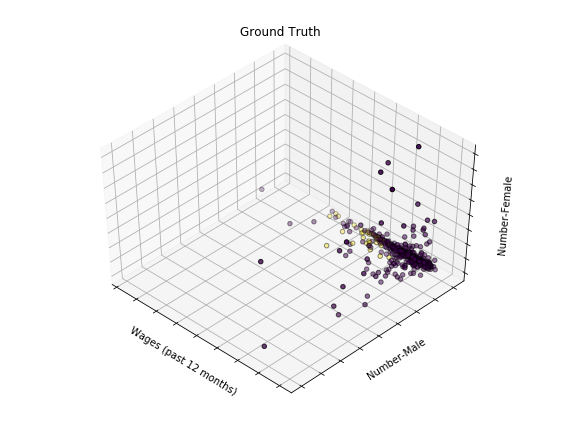

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y = np.choose(y, np.arange(2))
ax.scatter(X[:, 0], X[:, 3], X[:, 4], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Wages (past 12 months)')
ax.set_ylabel('Number-Male')
ax.set_zlabel('Number-Female')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


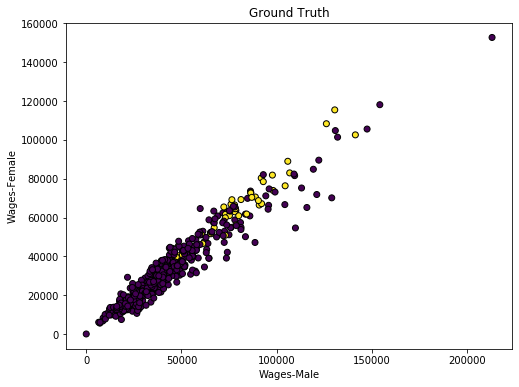

In [46]:
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)

y = np.choose(y, np.arange(2))
ax1.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k')

ax1.set_xlabel('Wages-Male')
ax1.set_ylabel('Wages-Female')
ax1.set_title('Ground Truth')
ax1.dist = 12

fig.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


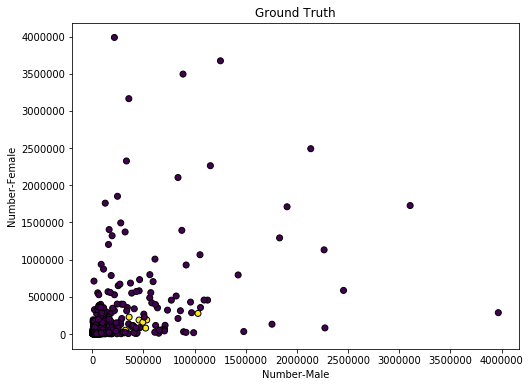

In [47]:
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)

y = np.choose(y, np.arange(2))
ax1.scatter(X[:, 3], X[:, 4], c=y, edgecolor='k')

ax1.set_xlabel('Number-Male')
ax1.set_ylabel('Number-Female')
ax1.set_title('Ground Truth')
ax1.dist = 12

fig.show()